# Report DAT121

# Content

1. Introduction
2. Method
3. Results
4. Discussion

# 1. Introduction


Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.

Records begin in June 14, 2015 and continue to September 3, 2018. However for most of the analysis only the records of 2016 and 2017 were used since these years were fully recorded.
The data is provided by Analyze Boston. The most up-to-date version can be found at https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system

Questions that we want to answer: What is the most common type of police respone? How does the number of responses change depending on the time of the day? How does the number of responses change during the week? How does the number of responses change during the year? Does responses increase during the holidays? How are the responses distrobuted in the city? How are the number of shootings distrobuted in the city? How many percent of responses are shootings? What type of response types involves the most shootings?

Crimes in Boston is a dataset containing the data of the crimes occurred in Boston from the middle of 2015 to the middle of 2019. The data does not only include felony cases by also minor incidents like property lost. The total amount of incident is 282 517 and 17 different variables is usually connected with each incident. The type of crime, date and time, location and if shooting occurred are some of the variables captured in the data.

Since the purpose of this data inspection is to extract information about boston and its offence-patterns and information, the following part is done to get a general overview of the data. 
The plots presented are extracted to gain information about the dataset in addition to getting a better understanding of Boston offences. Therefore the plots and graphs will be further commented under each section, in the light of what useful knowlegde there is to be found here.

#### The following plots are used to find answers to the following questions
##### Data related: 
* Can the data be used to find usefull information about developement of reported crimes in Boston?
* Is the data available for visualization without any formatting?

##### Content related:
* What crime is the most common?
* Which areas has the most crime incidents?
* Are the different crimes more thypical in specific areas?
* Does the number of crimes depend on time, day og place?
* Are there some specific patterns or correlations worth showing?

#### Overview of plots and graphs 
* Hourly distribution of crimes through a day
* Distribution of crimes through a week
* Month wise crime distribution
* Top ten crime types
* Year wise # of crimes
* A visual map of Boston with a descriptive layer of crime-info
* Streets with most crime-incidents

The preprocessing of the data will be further described in the section of Data Handling. (see 2. Handle data and remove non-valid inputs).


## 2. Method

## 2.1 Importing and inspecting data

In [32]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap

ModuleNotFoundError: No module named 'folium'

We use pandas for data manipulation, matplotlib and seanborn for plotting and folium to create a heatmap of the police responses.

In [34]:
# Import data
data = pd.read_csv('crime.csv', encoding='latin-1', low_memory=False)

Imports the csv file containing our data into a pandas dataframe

In [35]:
# Keep only data from complete years (2016, 2017)
data = data.loc[data['YEAR'].isin([2016,2017])]

We remove the incomplete years 2015 and 2018. This is done so that we can get an accurate analysis of how the responses vary during the year.

In [37]:
#Look at the data
data.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
25,I182080026,2629,Harassment,HARASSMENT,C6,256,NaN,2017-08-31 00:00:00,2017,8,Thursday,0,Part Two,MOUNT VERNON ST,42.317794,-71.042110,"(42.31779354, -71.04210959)"
89,I182079957,2629,Harassment,HARASSMENT,A1,110,NaN,2017-05-01 09:00:00,2017,5,Monday,9,Part Two,OLIVER ST,42.355633,-71.052646,"(42.35563262, -71.05264582)"
90,I182079957,2647,Other,THREATS TO DO BODILY HARM,A1,110,NaN,2017-05-01 09:00:00,2017,5,Monday,9,Part Two,OLIVER ST,42.355633,-71.052646,"(42.35563262, -71.05264582)"
424,I182079578,3114,Investigate Property,INVESTIGATE PROPERTY,B2,329,NaN,2017-05-02 12:59:00,2017,5,Tuesday,12,Part Three,BRUNSWICK ST,42.310900,-71.080077,"(42.31089986, -71.08007661)"
3173,I182076634,2629,Harassment,HARASSMENT,E18,482,NaN,2016-09-22 12:00:00,2016,9,Thursday,12,Part Two,MALTA ST,42.265067,-71.097685,"(42.26506676, -71.09768522)"
3215,I182076588,3201,Property Lost,PROPERTY - LOST,C11,359,NaN,2017-09-22 00:00:00,2017,9,Friday,0,Part Three,TREMLETT ST,42.295271,-71.067758,"(42.29527071, -71.06775815)"
4297,I182075441,2647,Other,THREATS TO DO BODILY HARM,C6,223,NaN,2017-09-11 18:38:00,2017,9,Monday,18,Part Two,N ST,42.336132,-71.031296,"(42.33613224, -71.03129582)"
4612,I182075110,1107,Fraud,FRAUD - IMPERSONATION,E5,941,NaN,2017-11-27 17:23:00,2017,11,Monday,17,Part Two,BROOKWAY TER,42.290664,-71.119841,"(42.29066443, -71.11984079)"
4686,I182075028,1107,Fraud,FRAUD - IMPERSONATION,C11,396,NaN,2016-09-01 00:00:00,2016,9,Thursday,0,Part Two,CENTRE AVE,42.292729,-71.063217,"(42.29272948, -71.06321700)"
5202,I182074444,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,91,NaN,2017-12-17 12:00:00,2017,12,Sunday,12,Part Two,FULTON ST,42.361968,-71.053546,"(42.36196785, -71.05354580)"



We take a look at the data to see what needs to be done.

In [40]:
#Look at the types of the columns
data.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

We check the column types to make sure everything looks ok.

In [41]:
# Remove unused columns
data = data.drop(['INCIDENT_NUMBER', 'Location'], axis=1)

We remove the columns INCIDENT_NUMBER and Location because we wont be using these for the analysis. INCIDENT_NUMBER just gives a unique value for every response and Location gives the coordinates of the response in a tuple. There are seperate columns for latitude and longitude so the Location column is redundant.

In [42]:
# Convert OCCURED_ON_DATE to datetime
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])

We convert the date of the respone into a format that pandas is designed to handle.

In [43]:
# Fill in nans in SHOOTING column
data.SHOOTING.fillna('N', inplace=True)

Replace every NaN in the SHOOTING column with the letter N, The letter N represents No Shooting. It was quite strange that they decided to assign NaN for no shooting in the dataset.

In [44]:
# Convert DAY_OF_WEEK to an ordered category
data.DAY_OF_WEEK = pd.Categorical(data.DAY_OF_WEEK, 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

We make the DAY_OF_WEEK column into an ordered catagory, this is done so that if we plot the data in this column the days will be plotted in the correct order. If we did not do this then the column would be alphabetically ordered.

In [45]:
# Replace -1 values in Lat/Long with Nan
data.Lat.replace(-1, None, inplace=True)
data.Long.replace(-1, None, inplace=True)

In the dataset they decided to assign -1 to the latitude and longitude values that were missing. We change these to NaN.

In [46]:
# Rename columns to something easier to type (the all-caps are annoying!)
rename = {'OFFENSE_CODE_GROUP':'Group',
         'OFFENSE_DESCRIPTION':'Description',
         'DISTRICT':'District',
         'REPORTING_AREA':'Area',
         'SHOOTING':'Shooting',
         'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year',
         'MONTH':'Month',
         'DAY_OF_WEEK':'Day',
         'HOUR':'Hour',
         'STREET':'Street'}
data.rename(index=str, columns=rename, inplace=True)

We just rename the columns to make them easier to type

In [47]:
#Building DF Districts
districts = {'A1':'Downtwon', 'A15':'Charlestown', 'A7':'East Boston', 'B2':'Roxbury', 
             'B3':'Mattapan', 'C11':'Dorchester', 'C6':'South Boston', 'D14':'Brighton', 
             'D4':'South End', 'E13':'Jamaica Plain', 'E18':'Hyde Park', 'E5':'West Roxbury'  
            } 
#Replace district names
data = data.replace(to_replace=districts)


We change the district codes to their actual names.

In [48]:
# Check how many NaN we have in each column
data.isnull().sum()

OFFENSE_CODE        0
Group               0
Description         0
District         1085
Area                0
Shooting            0
Date                0
Year                0
Month               0
Day                 0
Hour                0
UCR_PART           73
Street           8441
Lat             13691
Long            13691
dtype: int64

We want to see how the NaNs are distributed between columns

Text(0.5,1,'Null Values')

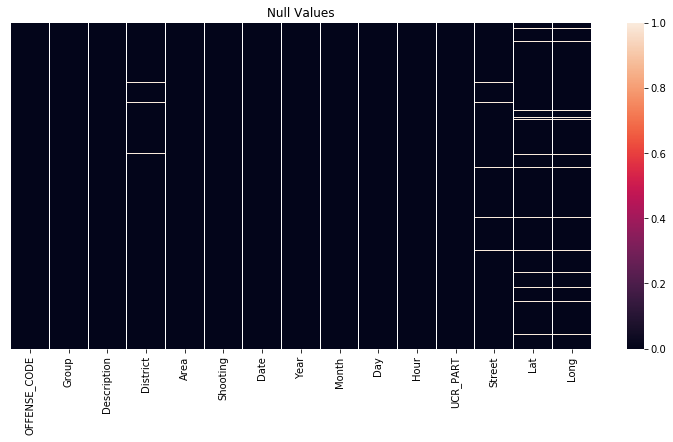

In [49]:
#Look at missing data
figure = plt.figure(figsize=(13,6))
sns.heatmap(data.isnull(),yticklabels='')
plt.title('Null Values')

Graphical view of how the NaNs are distrobuted in the data. The horizontal white lines indicate a NaN value.

In [50]:
#Check the size of dataset
data.shape

(200072, 15)


Checking the size of the dataset.

In [51]:
#Remove any rows with NaN
data = data.dropna()

We remove any data points that has NaN values so that every data point can be used for analysis.

In [52]:
#Check new size of dataset
data.shape

(184652, 15)

We check the new size of the dataset after the datapoints with NaNs has been removed. We see that we still have a lot of data and so removing the NaNs is not a problem.

## 2.2 Occurences of different response types

In [53]:
# Countplot for crime types without the crime group other, this is done because Other is not informative.
indexNames = data[data['Group'] == "Other" ].index
data_no_other = data.drop(indexNames)
sns.catplot(y='Group',
           kind='count',
            height=8, 
            aspect=1.5,
            order=data_no_other.Group.value_counts().index,
           data=data_no_other)

AttributeError: module 'seaborn' has no attribute 'catplot'

Plot of occurences of different response types. We removed the type OTHER because it is not informative. We see that the most common type the police respond to is motor vehicle accidents.

## 2.3 Crimes by hour of the day

In [54]:
# Crimes by hour of the day
sns.catplot(x='Hour',
           kind='count',
            height=8.27, 
            aspect=3,
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Hour', fontsize=40)
plt.ylabel('Count', fontsize=40)

AttributeError: module 'seaborn' has no attribute 'catplot'

Here we see how the amount of responses vary during the day. The responses are at a low point in the early morning and then steadily increases during the day, peaking around 18.00.


## 2.4 Crimes by day of the week

In [55]:
# Crimes by day of the week
sns.catplot(x='Day',
           kind='count',
            height=8, 
            aspect=3,
           data=data)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

AttributeError: module 'seaborn' has no attribute 'catplot'


Here we see how the amount of responses vary during the week. The amount of responses does not differ alot between the days but Fridays is the most busy day and Sundays the least busy.

## 2.5 Crimes by month of the year

In [56]:
# Crimes by month of year
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='Month',
           kind='count',
            height=8, 
            aspect=3,
           data=data)
plt.xticks(np.arange(12), months, size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)

AttributeError: module 'seaborn' has no attribute 'catplot'


Here we see how the amount of responses vary during the year. The amount of responses goes up during the warmer months but there is also a lot of responses in Januari compared to the other winter months.

## 2.6 Incidents during Holidays

In [57]:
# Number every incident by day, Jan 1 = 1, Dec 31 = 364 etc...
data['Day_of_year'] = data.Date.dt.dayofyear 
# Group incident using day number and count the occurence of each day
data_holidays = data[data.Year == 2017].groupby(['Day_of_year']).size().reset_index(name='counts')

# Dates of major U.S. holidays in 2017
holidays = pd.Series(['2017-01-01', # New Years Day
                     '2017-01-16', # MLK Day
                     '2017-03-17', # St. Patrick's Day
                     '2017-04-17', # Boston marathon
                     '2017-05-29', # Memorial Day
                     '2017-07-04', # Independence Day
                     '2017-09-04', # Labor Day
                     '2017-10-10', # Veterans Day
                     '2017-11-23', # Thanksgiving
                     '2017-12-25']) # Christmas
holidays = pd.to_datetime(holidays).dt.dayofyear
holidays_names = ['NY',
                 'MLK',
                 'St Pats',
                 'Marathon',
                 'Mem',
                 'July 4',
                 'Labor',
                 'Vets',
                 'Thnx',
                 'Xmas']

Here we prepare the data so that we can plot the occurences of responses each day during 2017 with the holidays marked out on the plot.

AttributeError: module 'seaborn' has no attribute 'lineplot'

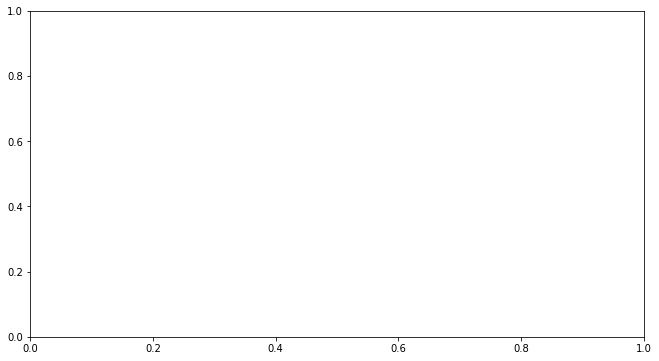

In [58]:
# Plot responses and holidays
fig, ax = plt.subplots(figsize=(11,6))
sns.lineplot(x='Day_of_year',
            y='counts',
            ax=ax,
            data=data_holidays)
plt.xlabel('Day of the year')
plt.vlines(holidays, 20, 350, alpha=0.5, color ='r')
for i in range(len(holidays)):
    plt.text(x=holidays[i], y=340, s=holidays_names[i])


Here we see that the reports generally go down during the holidays, this is contrary to popular belief that crimes increase on holidays. We do however see an increase in reports during St Patricks day compared to the souronding days, this might be because of the massive increase of alcohol consumption during this holiday.

## 2.7 Heat map of locations for reported incidents 

In [59]:
# Create basic Folium crime map
crime_map = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = data
data_heatmap = data[['Lat','Long']]
data_heatmap = data.dropna(axis=0, subset=['Lat','Long'])
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=8).add_to(crime_map)

# Plot!
crime_map

NameError: name 'folium' is not defined


Here we see a heatmap of police responses. The blue areas represent the lowest frequency and the red areas represents the highest frequency. We can see from the heatmap that downtown Boston is the area where the most responses happen.

## 2.8 Response street name

In [60]:
# Police response for top 50 streets
sns.catplot(y='Street',
           kind='count',
            height=8, 
            aspect=1.5,
            order=data.Street.value_counts().index[0:50],
           data=data)

AttributeError: module 'seaborn' has no attribute 'catplot'

Here we see a list of the top 50 streets where the most responses happen. Washington Street is way above the rest, this is probably because its a very long street and it goes through downtown Boston.

## 2.9 Crime map for shootings

In [61]:
# Create basic Folium crime map for shootings
crime_map_shooting = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = data[data.Shooting != "N"]
data_heatmap.shape
data_heatmap = data[['Lat','Long']]
data_heatmap = data.dropna(axis=0, subset=['Lat','Long'])
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=7).add_to(crime_map_shooting)

# Plot!
crime_map_shooting

NameError: name 'folium' is not defined

Here we see a heatmap of the shootings in Boston, we see that the hotspots on this map are similiar to the heatmap above. This indicates that there is no clear difference between where shootings happen compared to where responses on average occur.

In [62]:
# See how many percent of responds involves shootings.
data.Shooting.describe()

count     184652
unique         2
top            N
freq      184027
Name: Shooting, dtype: object

We take a look at the Shooting column to see how many of the respones was a shooting.

In [63]:
# Calculate percentage of responses are shootings
perc_shooting = 184014/184638
1-perc_shooting

0.0033795860007148626

We see that less than 0.5 % of the responses are shootings. This shows that its quite uncommon for the police officers to use their guns, even in America.

In [64]:
# Plot response type related to shootings.
data_shooting = data[data.Shooting != "N"]
sns.catplot(y='Group',
           kind='count',
            height=8, 
            aspect=1.5,
            order=data_shooting.Group.value_counts().index[0:10],
           data=data_shooting)
plt.suptitle("Crime related to shootings", y=1, fontsize=15, fontweight=0, color='black', style='italic')

AttributeError: module 'seaborn' has no attribute 'catplot'

Here we can see that the most common response type that involves shootings are Aggravated Assualt.

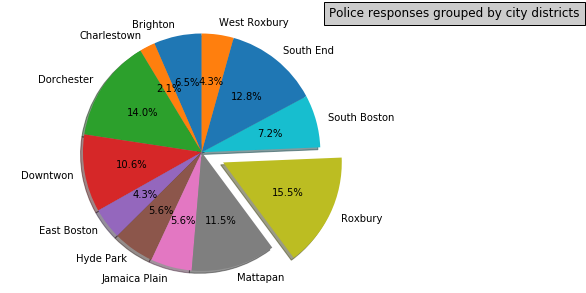

In [65]:
#Create Pieplot for how responses are distrobuted between the districts
labels = data['District'].astype('category').cat.categories.tolist()
counts = data['District'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
# only "explode" the 9nd slice (i.e. 'Roxbury')
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0 ,0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Police responses grouped by city districts", loc="center",
          bbox={'facecolor':'0.8', 'pad':5}, position=(1.1,1))
plt.show()

Here we see that Roxbury with 15.6 percent is the district with the most police responses.

### Top 10 Crimes - Ten most frequently reported incidents

The top 10 crime incidents reported in Boston during (2015-2019)are focussed in this section to get a better understanding of their occurence.

In [14]:
#import modules

import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv("crime.csv",encoding = "ISO-8859-1", low_memory=False)

data =df["OFFENSE_CODE_GROUP"].value_counts().head(10)
total =data.sum()

In [15]:
offensefinal=(data/total)*100
offensefinal
# Crime frequency in percentages

Motor Vehicle Accident Response    18.968553
Larceny                            13.266149
Medical Assistance                 12.050458
Investigate Person                  9.538495
Other                               9.257951
Drug Violation                      8.474517
Simple Assault                      8.089515
Vandalism                           7.864185
Verbal Disputes                     6.704205
Towed                               5.785971
Name: OFFENSE_CODE_GROUP, dtype: float64

#### Methods
The pandas libraries for python are used to import the data set as a data frame and perform the analysis.A pandas series is created with the the data in "OFFENSE_CODE_GROUP" alone for this specific analysis.The cummulative sum of each offense code is convereted to percentage for a better representation on a pie chart and the top ten offense codes are filtered for a better visualisation and analysis.The offense code group data grouped by offense code group represented in percentages are visualised as a piechart using the matplotlib function to plot.

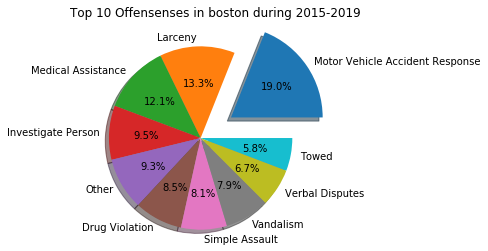

In [17]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = offensefinal.index
sizes=offensefinal.values
explode = (.2, 0, 0, 0, 0 , 0 ,0,0,0,0)  # only "explode" the 1st slice (i.e. 'Motor Vehicle')

fig1, ax1 = plt.subplots()
#ax1.set_title("Top 10 Offenses in the Boston during 2015-2019",loc="center")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0,radius =.5)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Top 10 Offensenses in boston during 2015-2019",loc="center")
plt.show()

In [18]:
df["OFFENSE_CODE_GROUP"].value_counts().head(10)

#Crime frequency in numbers (2015-2019)

Motor Vehicle Accident Response    38134
Larceny                            26670
Medical Assistance                 24226
Investigate Person                 19176
Other                              18612
Drug Violation                     17037
Simple Assault                     16263
Vandalism                          15810
Verbal Disputes                    13478
Towed                              11632
Name: OFFENSE_CODE_GROUP, dtype: int64

In [19]:
fulldf=df["OFFENSE_CODE_GROUP"].value_counts()

#### Results and Discussion
There are 67 categories of crime incidents reported in Boston area .Motor vehicle accident response and larceny were the two crimes most commonly reported in Boston accounting to 81611 incidents during mid 2015 to mid 2019 out of the 413132 crime incidents reported.The next two are Medical Assistance (31557 reported incidents) and Investigate Person (24203 reported incidents).Followed by Other(23252 reported incidents),Drug Violation(21394 reported incidents),Simple Assault(20607 reported incidents), Vandalism(19451 reported incidents),Verbal Dispute(17194 reported incidents),Investigate Property(14640 reported incidents).
Analysis suggests that motor vehicle accident response and larceny are the most frequently reported crimes.Deeper study of the crime trends over years , days and hours will enable the officials to investigate

### 2.1 Incident equency variation over days

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("crime.csv",encoding = "ISO-8859-1", low_memory=False)
mvardf=df[df['OFFENSE_CODE_GROUP'].str.contains("Motor Vehicle Accident Response")]
mvardf

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,2018-10-03 20:16:00,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
10,I182080043,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,D14,750,NaN,2018-10-03 19:33:00,2018,10,Wednesday,19,Part Three,FOSTER ST,42.344323,-71.157784,"(42.34432328, -71.15778368)"
15,I182080038,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018-10-03 19:30:00,2018,10,Wednesday,19,Part Three,NaN,42.315961,-71.090426,"(42.31596119, -71.09042564)"
20,I182080030,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,C6,234,NaN,2018-10-02 20:00:00,2018,10,Tuesday,20,Part Three,COLUMBIA RD,42.330015,-71.038513,"(42.33001489, -71.03851306)"
68,I182079979,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,255,NaN,2018-10-03 15:13:00,2018,10,Wednesday,15,Part Three,DORCHESTER AVE,42.310910,-71.057674,"(42.31091044, -71.05767414)"
72,I182079974,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,D14,773,NaN,2018-10-01 19:00:00,2018,10,Monday,19,Part Three,COLWELL AVE,42.342592,-71.155817,"(42.34259153, -71.15581674)"
77,I182079969,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,B2,613,NaN,2018-10-03 15:51:00,2018,10,Wednesday,15,Part Three,LONGWOOD AVE,42.339727,-71.108683,"(42.33972732, -71.10868260)"
91,I182079956,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,E18,822,NaN,2018-10-03 16:00:00,2018,10,Wednesday,16,Part Three,ALWIN ST,42.254699,-71.143553,"(42.25469908, -71.14355299)"
101,I182079947,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,B2,904,NaN,2018-10-03 15:34:00,2018,10,Wednesday,15,Part Three,DEGAUTIER WAY,42.330510,-71.080342,"(42.33050964, -71.08034174)"
117,I182079930,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,E18,520,NaN,2018-10-03 14:12:00,2018,10,Wednesday,14,Part Three,RIVER ST,42.256028,-71.121907,"(42.25602841, -71.12190725)"


In [23]:
daycount=mvardf['DAY_OF_WEEK'].value_counts()
daycount

Friday       6007
Saturday     5609
Wednesday    5401
Tuesday      5386
Thursday     5325
Monday       5266
Sunday       5140
Name: DAY_OF_WEEK, dtype: int64

In [24]:
mvardf['OFFENSE_CODE_GROUP'].value_counts()


Motor Vehicle Accident Response    38134
Name: OFFENSE_CODE_GROUP, dtype: int64

Text(0.5,0,'Days')

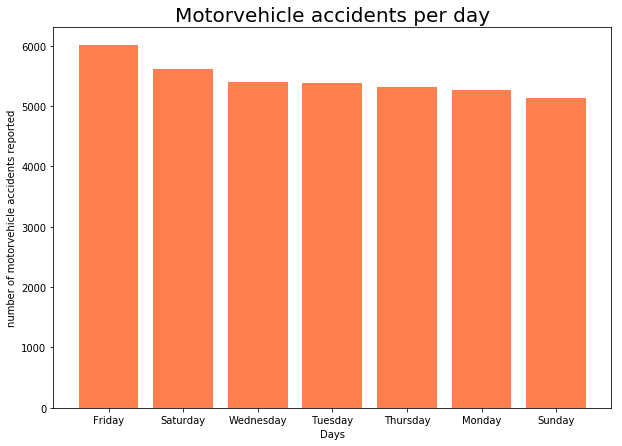

In [25]:
days = daycount.index
count= daycount.values

fig, axs = plt.subplots(figsize=(10,7), sharey=True)
#axs.set_title("",loc="center")
axs.bar(days, count,color="coral")
axs.set_title("Motorvehicle accidents per day",fontsize =20)
axs.set_ylabel("number of motorvehicle accidents reported")
axs.set_xlabel("Days")

### 2.1 Crime devolopment over the years
One of the main reasons to analyse this dataset would be to see if the amount of crime incidents are increasing or decreasing over the years. Here a visual plot will be created trying to visualize a posible trend.

#### Methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

The package Pandas is used to import the csv-file and arrange the data in a matrix. The data under the column "date" is transformed to a datetime object for later use, and columns are renamed for easier access. In this case the column "Date" is the only one really needed, but "Year" are also used for easier separation of data. Every day of each year is organized together in a dataframe, and then the objects from the same day are grouped together. To get the y-value, the total incidents on inch day are counted.

In [5]:
data = pd.read_csv('crime.csv', encoding='latin-1', low_memory=False)
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])
rename = {'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year'}
data.rename(index=str, columns=rename, inplace=True)

data = data.assign(Date=data.Date.dt.round('3D'))
date_data = data[["Date","Year"]]
data2015 = date_data.loc[date_data['Year'].isin([2015])]
data2016 = date_data.loc[date_data['Year'].isin([2016])]
data2017 = date_data.loc[date_data['Year'].isin([2017])]
data2018 = date_data.loc[date_data['Year'].isin([2018])]
data2019 = date_data.loc[date_data['Year'].isin([2019])]

data2017 = data2017[data2017["Date"] != "2018-01-01 00:00:00"]
data2017 = data2017[data2017["Date"] != "2016-12-31 00:00:00"]
data2018 = data2018[data2018["Date"] != "2019-01-02 00:00:00"]

data2015 = data2015.groupby("Date")
data2016 = data2016.groupby("Date")
data2017 = data2017.groupby("Date")
data2018 = data2018.groupby("Date")
data2019 = data2019.groupby("Date")


x_2015 = list(data2015.groups.keys())
x_2017 = list(data2017.groups.keys())
x_2018 = list(data2018.groups.keys())
x_2019 = list(data2019.groups.keys())


x_data2015 = [i.replace(year=2016) for i in x_2015]
x_data2017 = [i.replace(year=2016) for i in x_2017]
x_data2018 = [i.replace(year=2016) for i in x_2018]
x_data2019 = [i.replace(year=2016) for i in x_2019]

#### Results
In the result the data is presented visually in a lineplot by using the python package "matlibplot". The x-values represents every 3rd day in a year, and the y-values represents the total amount of crime incidents in this three days. It is used different colour codes for each year, and every year is plotted in one plot.

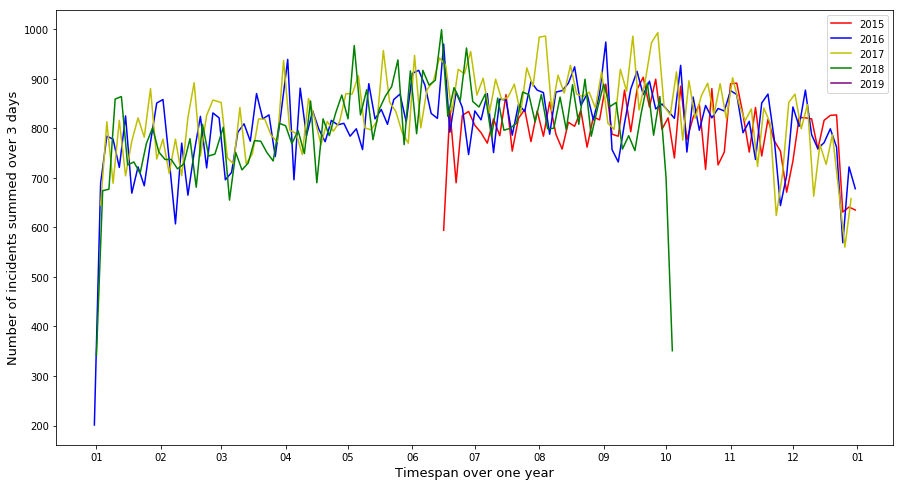

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x_data2015, data2015.count(), color="r", label="2015")
ax.plot(list(data2016.groups.keys()), data2016.count(), color="b", label="2016")
ax.plot(x_data2017, data2017.count(), color="y", label="2017")
ax.plot(x_data2018, data2018.count(), color="g", label="2018")
ax.plot(x_data2019, data2019.count(), color="Purple", label="2019")

plt.xlabel("Timespan over one year", fontsize=13)
plt.ylabel("Number of incidents summed over 3 days", fontsize= 13)

months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%m')
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_major_locator(months)

ax.legend()
plt.show()

A numerical result is also given. Here the mean value over three days in a year is given.


In [7]:
print(data2015.count().mean())
print(data2016.count().mean())
print(data2017.count().mean())
print(data2018.count().mean())
print(data2019.count().mean())

Year    796.895522
dtype: float64
Year    805.96748
dtype: float64
Year    829.801653
dtype: float64
Year    799.526882
dtype: float64
Year   NaN
dtype: float64


#### Discussion
The date in the data is reformatted so all the incidents in a span over 3 days are grouped together. If this had not been done it would have been a lot of spikes in the y-values and even harder to see a trend. A negative consequence of this is in some cases the first or last days in the year are grouped in wrong year. A result of this can be seen for year 2016 and 2018 at the start of the plot were the y-value is way too low. The dates organized in a wrong year is removed, a fast solution, but maybe not the best. Because we are looking for a trend over 365 days, remove one or two days is not that big of a problem for the result.
The spikes down at the start of 2015 and at the end of 2019 plot are a result of a not complete year. Since the data is from mid-2015 to mid-2019, and most likely the start and end y-value is not based on three full days.
Visually a trend can't really be seen in the plot. The difference in the years are not on more than 200 incidents per point, and this is not a continuing difference over the year. Also, the mean value over the year seems to be quiet stable, and with that we can’t see a rise or fall in the amount of crime incidents.

#### 2.2 Point plot on a map based on timeintervals

To get more spesific information on when and were the incedent occur, we present this with a map over Boston. The point incedents are plotted over different time interval on the map.

#### Methods
To be able to plot the data in a specific way, the data needs to be rearranged.
First the necessary python packages are imported to the script. These packages are needed to arrange the data, get an image based on latitude and longitude, and plot the data in an easy way.

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap #conda install -c anaconda basemap
import pandas as pd

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'


The package Pandas is used to import the csv-file and arrange the data in a matrix. We filter out all the columns except "HOUR", "Lat" and "Long", who is needed for the plot. The objects containing a variable value of -1 or none is removed from the dataset. All the object in the same time interval have their "Hour" value set to a common value. The objects are then grouped together on this value into three different groups; 10, 18 and 0.

In [11]:
data = pd.read_csv("crime.csv", encoding = "ISO-8859-1", low_memory=False)

hour_data = data[["HOUR", "Lat", "Long"]]
hour_data.replace(-1, None, inplace=True)
hour_data = hour_data.dropna()

numbers1 = [4,5,6,7,8,9,11]
for n in numbers1:
    hour_data["HOUR"].replace(n, 10, inplace=True)

numbers2 = [12,13,14,15,16,17,19]
for n in numbers2:
    hour_data["HOUR"].replace(n, 18, inplace=True)

numbers3 = [20,21,22,23,1,2,3]
for n in numbers3:
    hour_data["HOUR"].replace(n, 0, inplace=True)

new_data = hour_data.groupby("HOUR")
new_data.get_group(0).Lat


lat1 = new_data.get_group(10).Lat
lon1 = new_data.get_group(10).Long
lat2 = new_data.get_group(18).Lat
lon2 = new_data.get_group(18).Long
lat3 = new_data.get_group(0).Lat
lon3 = new_data.get_group(0).Long

#### Results
In the result the data is presented visually in three different point plots on the map of Boston. To distinct the maps from each other different colour is used for the points. One point represents one crime incident, but the colour will be the same even if the points overlap. The opacity of the points is reduced to better see a difference between the maps.


NameError: name 'Basemap' is not defined

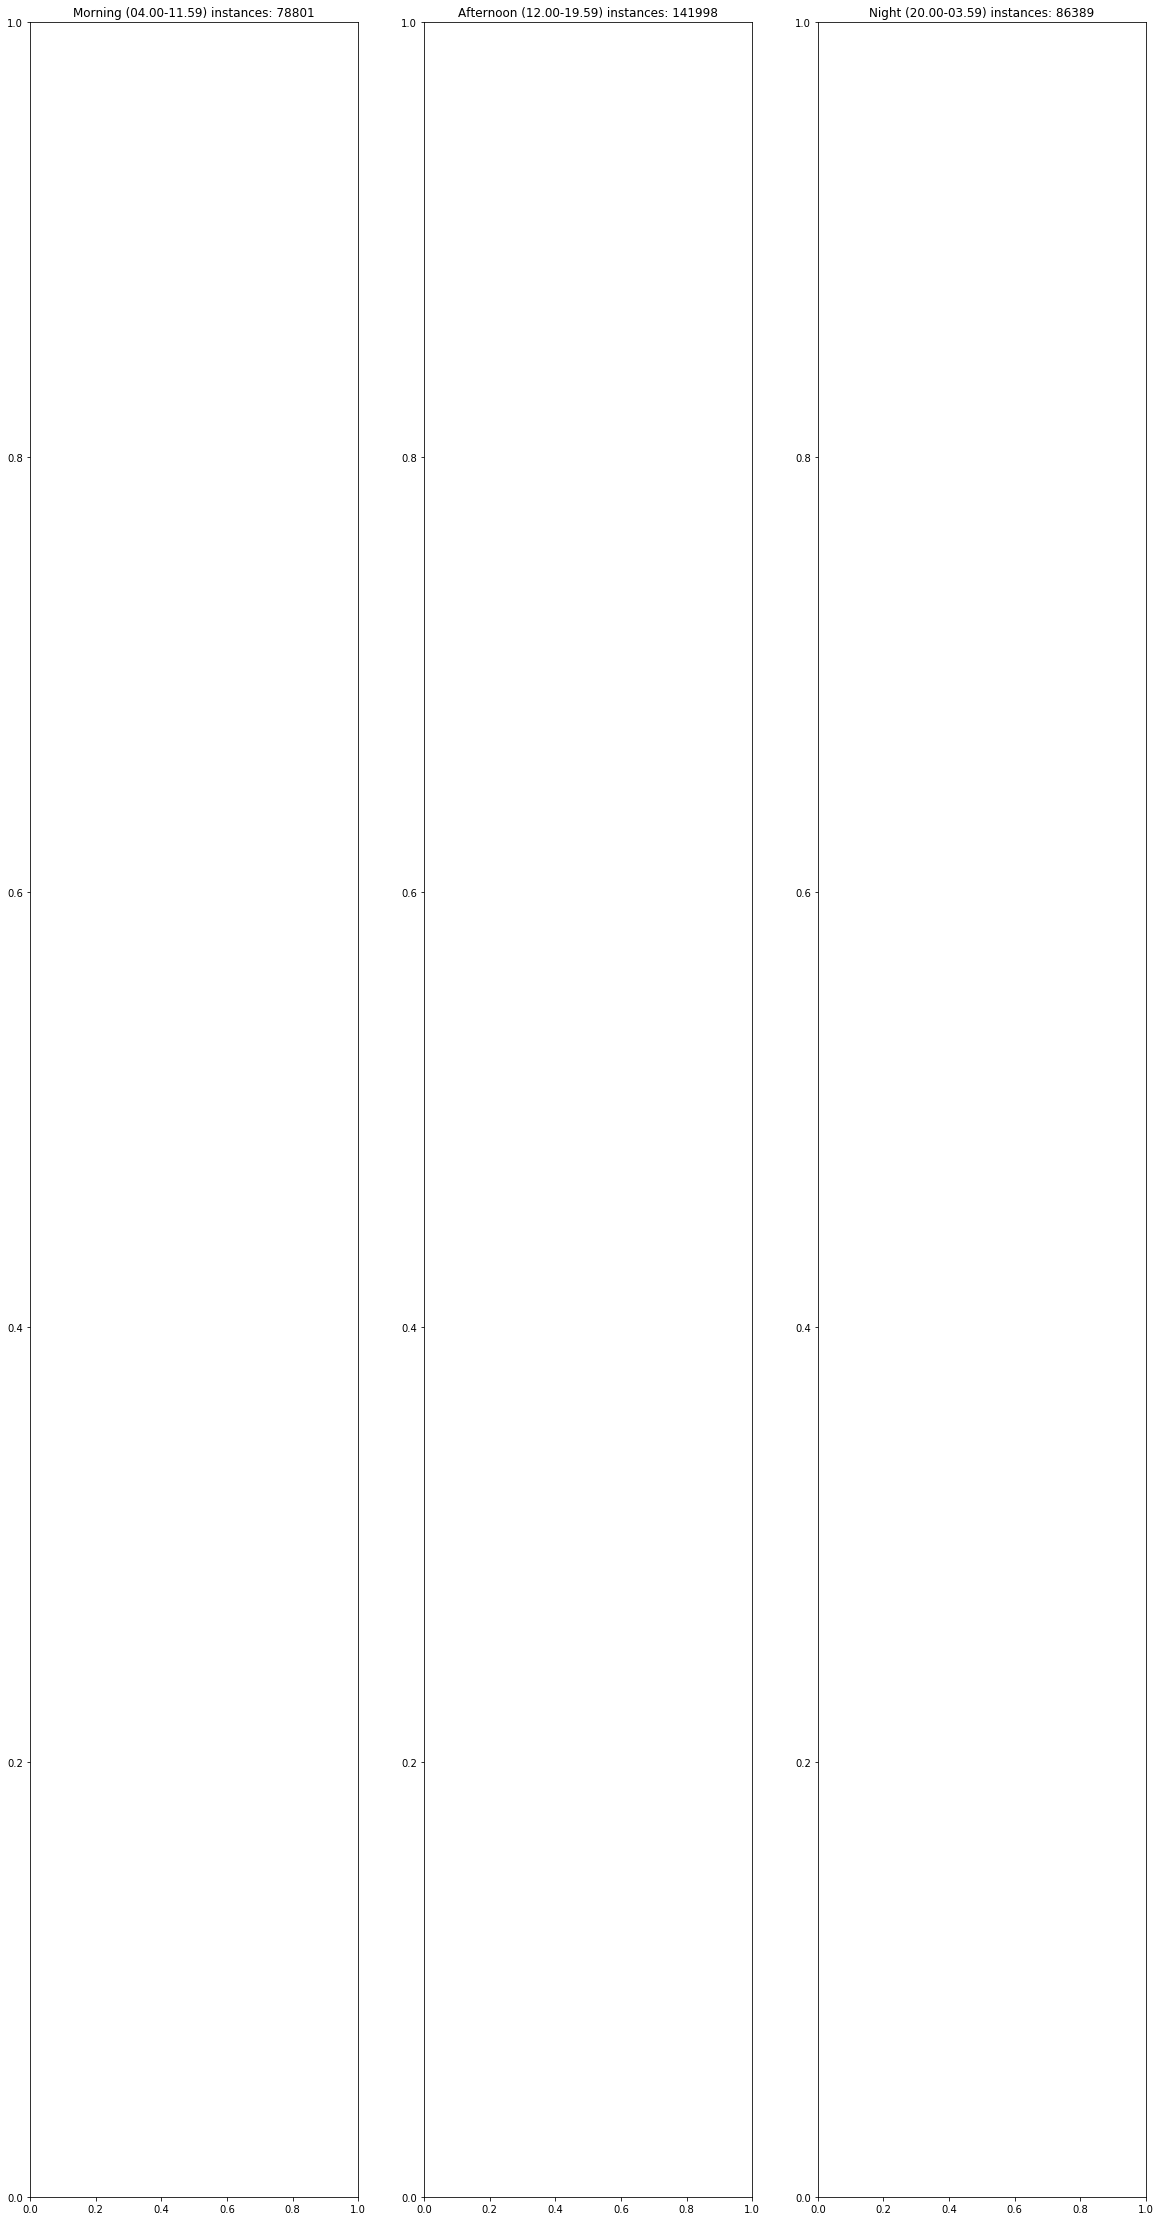

In [12]:
gs = gridspec.GridSpec(1,3)

plt.figure( figsize=(20, 40))
ax1 = plt.subplot(gs[0,0])
ax1.set_title("Morning (04.00-11.59) instances: " + str(lat1.size))
ax2 = plt.subplot(gs[0,1])
ax2.set_title("Afternoon (12.00-19.59) instances: " + str(lat2.size))
ax3 = plt.subplot(gs[0,2])
ax3.set_title("Night (20.00-03.59) instances: " + str(lat3.size))

m1 = Basemap(llcrnrlon=-71.25, llcrnrlat=42.2, urcrnrlon=-70.85, urcrnrlat=42.5, epsg=4269, ax=ax1)
m1.arcgisimage(service="ESRI_Imagery_World_2D", xpixels = 2000, verbose= True)

x, y = m1(lon1, lat1)

ax1.scatter(x, y, 1, marker=".", color="Red", alpha=0.1)

m2 = Basemap(llcrnrlon=-71.25, llcrnrlat=42.2, urcrnrlon=-70.85, urcrnrlat=42.5, epsg=4269, ax=ax2)
m2.arcgisimage(service="ESRI_Imagery_World_2D", xpixels = 2000, verbose= True)

x, y = m2(lon2, lat2)

ax2.scatter(x, y, 1, marker=".", color="Yellow", alpha=0.1)

m3 = Basemap(llcrnrlon=-71.25, llcrnrlat=42.2, urcrnrlon=-70.85, urcrnrlat=42.5, epsg=4269, ax=ax3)
m3.arcgisimage(service="ESRI_Imagery_World_2D", xpixels = 2000, verbose= True)

x, y = m3(lon3, lat3)

ax3.scatter(x, y, 1, marker=".", color="Blue", alpha=0.1)

plt.show()

#### Discussion
Visually it can show that the plot for afternoon have the most points by looking at the outside of the city. This can be misleading because a lot of point can overlay each other but not show any difference on the map. The crime incidents in the time interval between 12:00 and 19:59 are almost double the amount of crimes in the two other time intervals, but visually we can't see that big of a difference between the maps

### 2.1 Spesific Crime trends
We examine the crime trends of the top 5 most commonly reported incidents(Motor vehicle accident response,Larceny,Medical assistance,investigate person) over days of a week.The following trends are observed:

In [27]:
#import modules 
import pandas as pd

df= pd.read_csv("crime.csv", encoding = "ISO-8859-1", low_memory=False)

category_names =df["OFFENSE_CODE_GROUP"].value_counts()
type(category_names)
fin=category_names.head()
names=fin.index
#df.isnull().sum()

#### Methods
The pandas libraries for python are used to import the data set as a data frame and perform the analysis.A pandas series is created with the the data in "OFFENSE_CODE_GROUP" alone for this specific analysis.The 5 most reported incidents are selected for a better understanding of the trend of incident reported over days.The dat frame plot function is used for plotting the line graphs for comparing the trends.

In [29]:
pd.options.mode.chained_assignment = None  # default='warn'


Text(0,0.5,'Number of events reported')

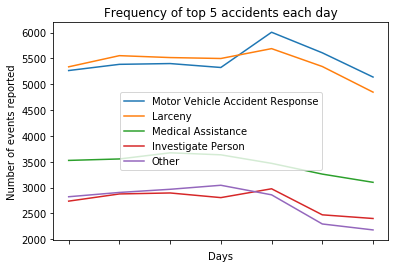

In [30]:
#To find the number of occurence of top 5 accidents each day

n=1
bar={}
for entry in names:
    newdf=df[df['OFFENSE_CODE_GROUP'].str.contains(entry)]
    newdf['DAY_OF_WEEK']=pd.Categorical(newdf['DAY_OF_WEEK'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
    crashes_by_day = newdf['DAY_OF_WEEK'].value_counts()
    crashes_by_day=crashes_by_day.sort_index()
    bar[entry]=crashes_by_day.values
    n = n+1
    
    
    

dictdf = pd.DataFrame(bar)
lastdictdf=dictdf.set_index(crashes_by_day.index)
    
accident_plot=lastdictdf.plot(kind="line")
accident_plot.set_title("Frequency of top 5 accidents each day")
accident_plot.set_xlabel("Days")
accident_plot.set_ylabel("Number of events reported")

#Comparison of 5 most commonly reported crimes with days.

#### Inference and Comments
There are 67 categories of crime incidents reported in Boston area .Motor vehicle accident response and larceny were the two crimes most commonly reported in Boston accounting to 81611 incidents during mid 2015 to mid 2019 out of the 413132 crime incidents reported.The next two are Medical Assistance (31557 reported incidents) and Investigate Person (24203 reported incidents).Followed by Other(23252 reported incidents).
Interestingly medical assistance,Investigate person and Other decrease over the weekend.Most of the incidents in the data were reported on friday except for Medical assistance (wednesdays) and other (thursdays).Motorvehicle accident response are the most reported incident on all days ,with the lowest number reported on Sundays. Investigate person and Others are the least reported on all days out of the five ,with their highest recordings on Friday and Thursday.
In [11]:


In [31]:
lastdictdf

,Motor Vehicle Accident Response,Larceny,Medical Assistance,Investigate Person,Other
Monday,5266,5338,3527,2739,2824
Tuesday,5386,5554,3555,2878,2907
Wednesday,5401,5517,3674,2897,2968
Thursday,5325,5499,3635,2807,3046
Friday,6007,5690,3470,2978,2861
Saturday,5609,5344,3262,2474,2297
Sunday,5140,4848,3103,2403,2182


## 3. Results
* Motor vehicle accident response was found to be the most commonly reported incident in Boston during 2015-2019
* The month of February was found to be most safest month of the year with least number of reporting's and July was the least safest.
* Sunday was found to be the safest day of the week.
* Crime reporting are highest at evening 17:00 hrs and lowest at morning 4:00 - 5:00 hrs.
* Analysis suggests the prime locations of incident reporting.
* Finding out why most reporting are in July might serve as an added benefit in efficient crime check
* Crime reporting are highest in the evenings suggesting that reporting are more common when people are out.
* Analysis of prime locations of reporting enables the department and officials to keep a check on the areas and enhance safety .
* Holidays show a specific lowered trend in crime reporting which raises questions about the correlation with other factors. 



## 4. Discussion and review of the work done
----- 
The data used in this work is collected by the Crime Incident Report system provided by Boston Police Department. There is therefore high confidence in the data contained, and it is not imputed any new values to the dataset in the means of handling NAN-values in the set. For the goal of this assignment, which was to inspect the dataset with a general approach, there was no need to calculate and handle missing data by using imputing-strategies of mean/meadian etc. The approach when dealing with missing data here, has been to discard the columns with missing values for the relevant graph or plot.
One could argue that this leads to loss of valuable data, but the inspection and plotting done here is for getting an overview using alot of datapoints compared to the entities with missing values. For the same reason, the very few outlier-alike values in the datapoints where included in the plots. The conclusions and results made in this assignment should still be read with this in mind, and adjustments may be nescessary for specific tasks in future work.

The inspection and visualization done in this project can be seen as a good place to start for further work on the Bostin Crime Dncident Data. The dataset mostly containes time and place-descriptive information. Therefore it was natural to start visualizing developement of incidents over a period of time. 

The knowlegde obtained from datainspection is a valuable asset when providing services such as public help or when handling a finite amount of resources (tax income). Knowing what a thypical day, week, month or year looks like can be benefitial when trying to pinpoint how to prioritize resources and workforce to reduce bad outcomes from police responses. Further work on this assignment could include trying to make good predictions of what kind of incidences will happen at a given time, and where. When using different methods for machine learning, one should also consider how to handle categorical data in dataset for optimizig the results, 

